# Notebook to plot freezing point and ice concentration of idealized simulation.

Import and start dask client. 

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import gsw
import cmocean as cm
import xrft
import matplotlib.colors as colors
import matplotlib
from scipy import stats
import matplotlib as mpl

In [2]:
import nc_time_axis

In [3]:
from dask.distributed import Client
import dask
import os

client =Client(n_workers=8, threads_per_worker=1, memory_limit="4 GiB",local_directory="/home1/scratch/jmartine/tmp")
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 8,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:50695,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:42293,Total threads: 1
Dashboard: http://127.0.0.1:45665/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:33765,


Load the data using the Import_Expt_Front, that allows to open all the experiments within a folder ath the same time.

### Important!  
the folder names within the folder path of the experiments must contain the name "expt_XXX". 

i.e.
`
expt_000 expt_001 expt_002 expt_front_0
`

In [4]:
from utils import Import_Expt_Front, date_fmt

In [5]:
folder = '/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/ICE-CHANEL/ice_formation_4.2.0_output/'
EXF = Import_Expt_Front(folder)

Define the experiments to ignore in the list `exp_filter`, in this case, ignore the experiments with no ice velocities.

In [6]:
exp_filter = ['expt_front_1_noICEvel','expt_front_05_noICEvel']

Slice data on time to contain from the 2nd of July until the 31st of December of the second year of the simulation

In [7]:
t0 = slice('0002-09-15', '0002-12-31')
freq="1d"

### Load data

In [8]:
dataset_rhop_3h = EXF.import_multipe_expt('grid_T',vars_of_interest=['toce','soce','rhop'],expt_filter=exp_filter,freq=freq, chunks={'time_counter':5}).sel(time_counter=t0, y=slice(1,-1))

In [9]:
dataset_icemod_3h = EXF.import_multipe_expt('icemod',vars_of_interest=['icevolu', 'iceconc'], expt_filter=exp_filter, freq=freq, chunks={'time_counter':5}).sel(time_counter=t0,y=slice(1,-1))

In [10]:
surface_property = dataset_rhop_3h.isel(deptht=0,y=slice(1,-1))

In [11]:
surface_property_std = surface_property.std(('x','y')).compute()

In [12]:
ice_property_std = dataset_icemod_3h.std(('x','y')).compute()

In [13]:
t0f = '0002-09-15'
tff = '0002-10-15'
spectra_time_slice = ice_property_std.time_counter.sel(time_counter=slice(t0f,tff)).values

In [14]:
def envelope_plot(data,time_slice,ax,color='k'):
    at= ax.twinx()
    at.plot(time_slice[1:-1],np.ones_like(time_slice[1:-1],dtype=float),color=color,linewidth=4,alpha=0.7,zorder=0)
    at.plot(time_slice[1:-1],np.zeros_like(time_slice[1:-1],dtype=float),color=color,linewidth=4,alpha=0.7,zorder=0)
    at.plot([time_slice[0],time_slice[0]],[0,1],color=color,linewidth=2,alpha=0.7,zorder=0)
    at.plot([time_slice[-1],time_slice[-1]],[0,1],color=color,linewidth=2,alpha=0.7,zorder=0)
    
    at.set_ylim(0,1)
    at.set_yticks([])

# Load spectra from postprocessed data.

In [15]:
PSD =xr.open_dataset(folder+'/postprocessed/spectra_surf_temperature.nc').sel(time=t0)

In [16]:
xaxis_Temp = PSD["toce_front_0_om"].mean('y')*1000
PSD_Temp_0 =  PSD["toce_front_0_PSD"].mean('y')
PSD_Temp_05 =  PSD["toce_front_05_noTf_PSD"].mean('y')
PSD_Temp_1 =  PSD["toce_front_1_noTf_PSD"].mean('y')

In [17]:
PSD =xr.open_dataset(folder+'/postprocessed/spectra_surf_salinity.nc').sel(time=t0)

In [18]:
xaxis_Salt = PSD["soce_front_0_om"].mean('y')*1000
PSD_Salt_0 =  PSD["soce_front_0_PSD"].mean('y')
PSD_Salt_05 =  PSD["soce_front_05_noTf_PSD"].mean('y')
PSD_Salt_1 =  PSD["soce_front_1_noTf_PSD"].mean('y')

In [19]:
PSD =xr.open_dataset(folder+'/postprocessed/spectra_surf_density.nc').sel(time=t0)

In [20]:
xaxis = PSD["rhop_front_0_om"].mean('y')*1000
PSD_0 =  PSD["rhop_front_0_PSD"].mean('y')
PSD_05 =  PSD["rhop_front_05_noTf_PSD"].mean('y')
PSD_1 =  PSD["rhop_front_1_noTf_PSD"].mean('y')

In [21]:
PSD_ice =xr.open_dataset(folder+'/postprocessed/spectra_ice.nc').sel(time=t0)

In [22]:
xaxis_ice = PSD_ice["icevolu_front_0_om"].mean('y')*1000
PSD_ice_0 =  PSD_ice["icevolu_front_0_PSD"].mean('y')
PSD_ice_05 =  PSD_ice["icevolu_front_05_noTf_PSD"].mean('y')
PSD_ice_1 =  PSD_ice["icevolu_front_1_noTf_PSD"].mean('y')

In [23]:
RD = xr.open_dataset(folder+'/postprocessed/RD_simulations.nc').sel(time_counter=t0)/1000

## Plot spectra and time series of the standard deviation of each property.

/dev/shm/pbs.2157187.datarmor0/ipykernel_37465/2930785365.py:154: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  [ a.set_yticklabels(updated_labels,fontsize=8) for a in ax_km ]
/dev/shm/pbs.2157187.datarmor0/ipykernel_37465/2930785365.py:154: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  [ a.set_yticklabels(updated_labels,fontsize=8) for a in ax_km ]
/dev/shm/pbs.2157187.datarmor0/ipykernel_37465/2930785365.py:154: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  [ a.set_yticklabels(updated_labels,fontsize=8) for a in ax_km ]
/dev/shm/pbs.2157187.datarmor0/ipykernel_37465/2930785365.py:159: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[-1,0].set_xticklabels

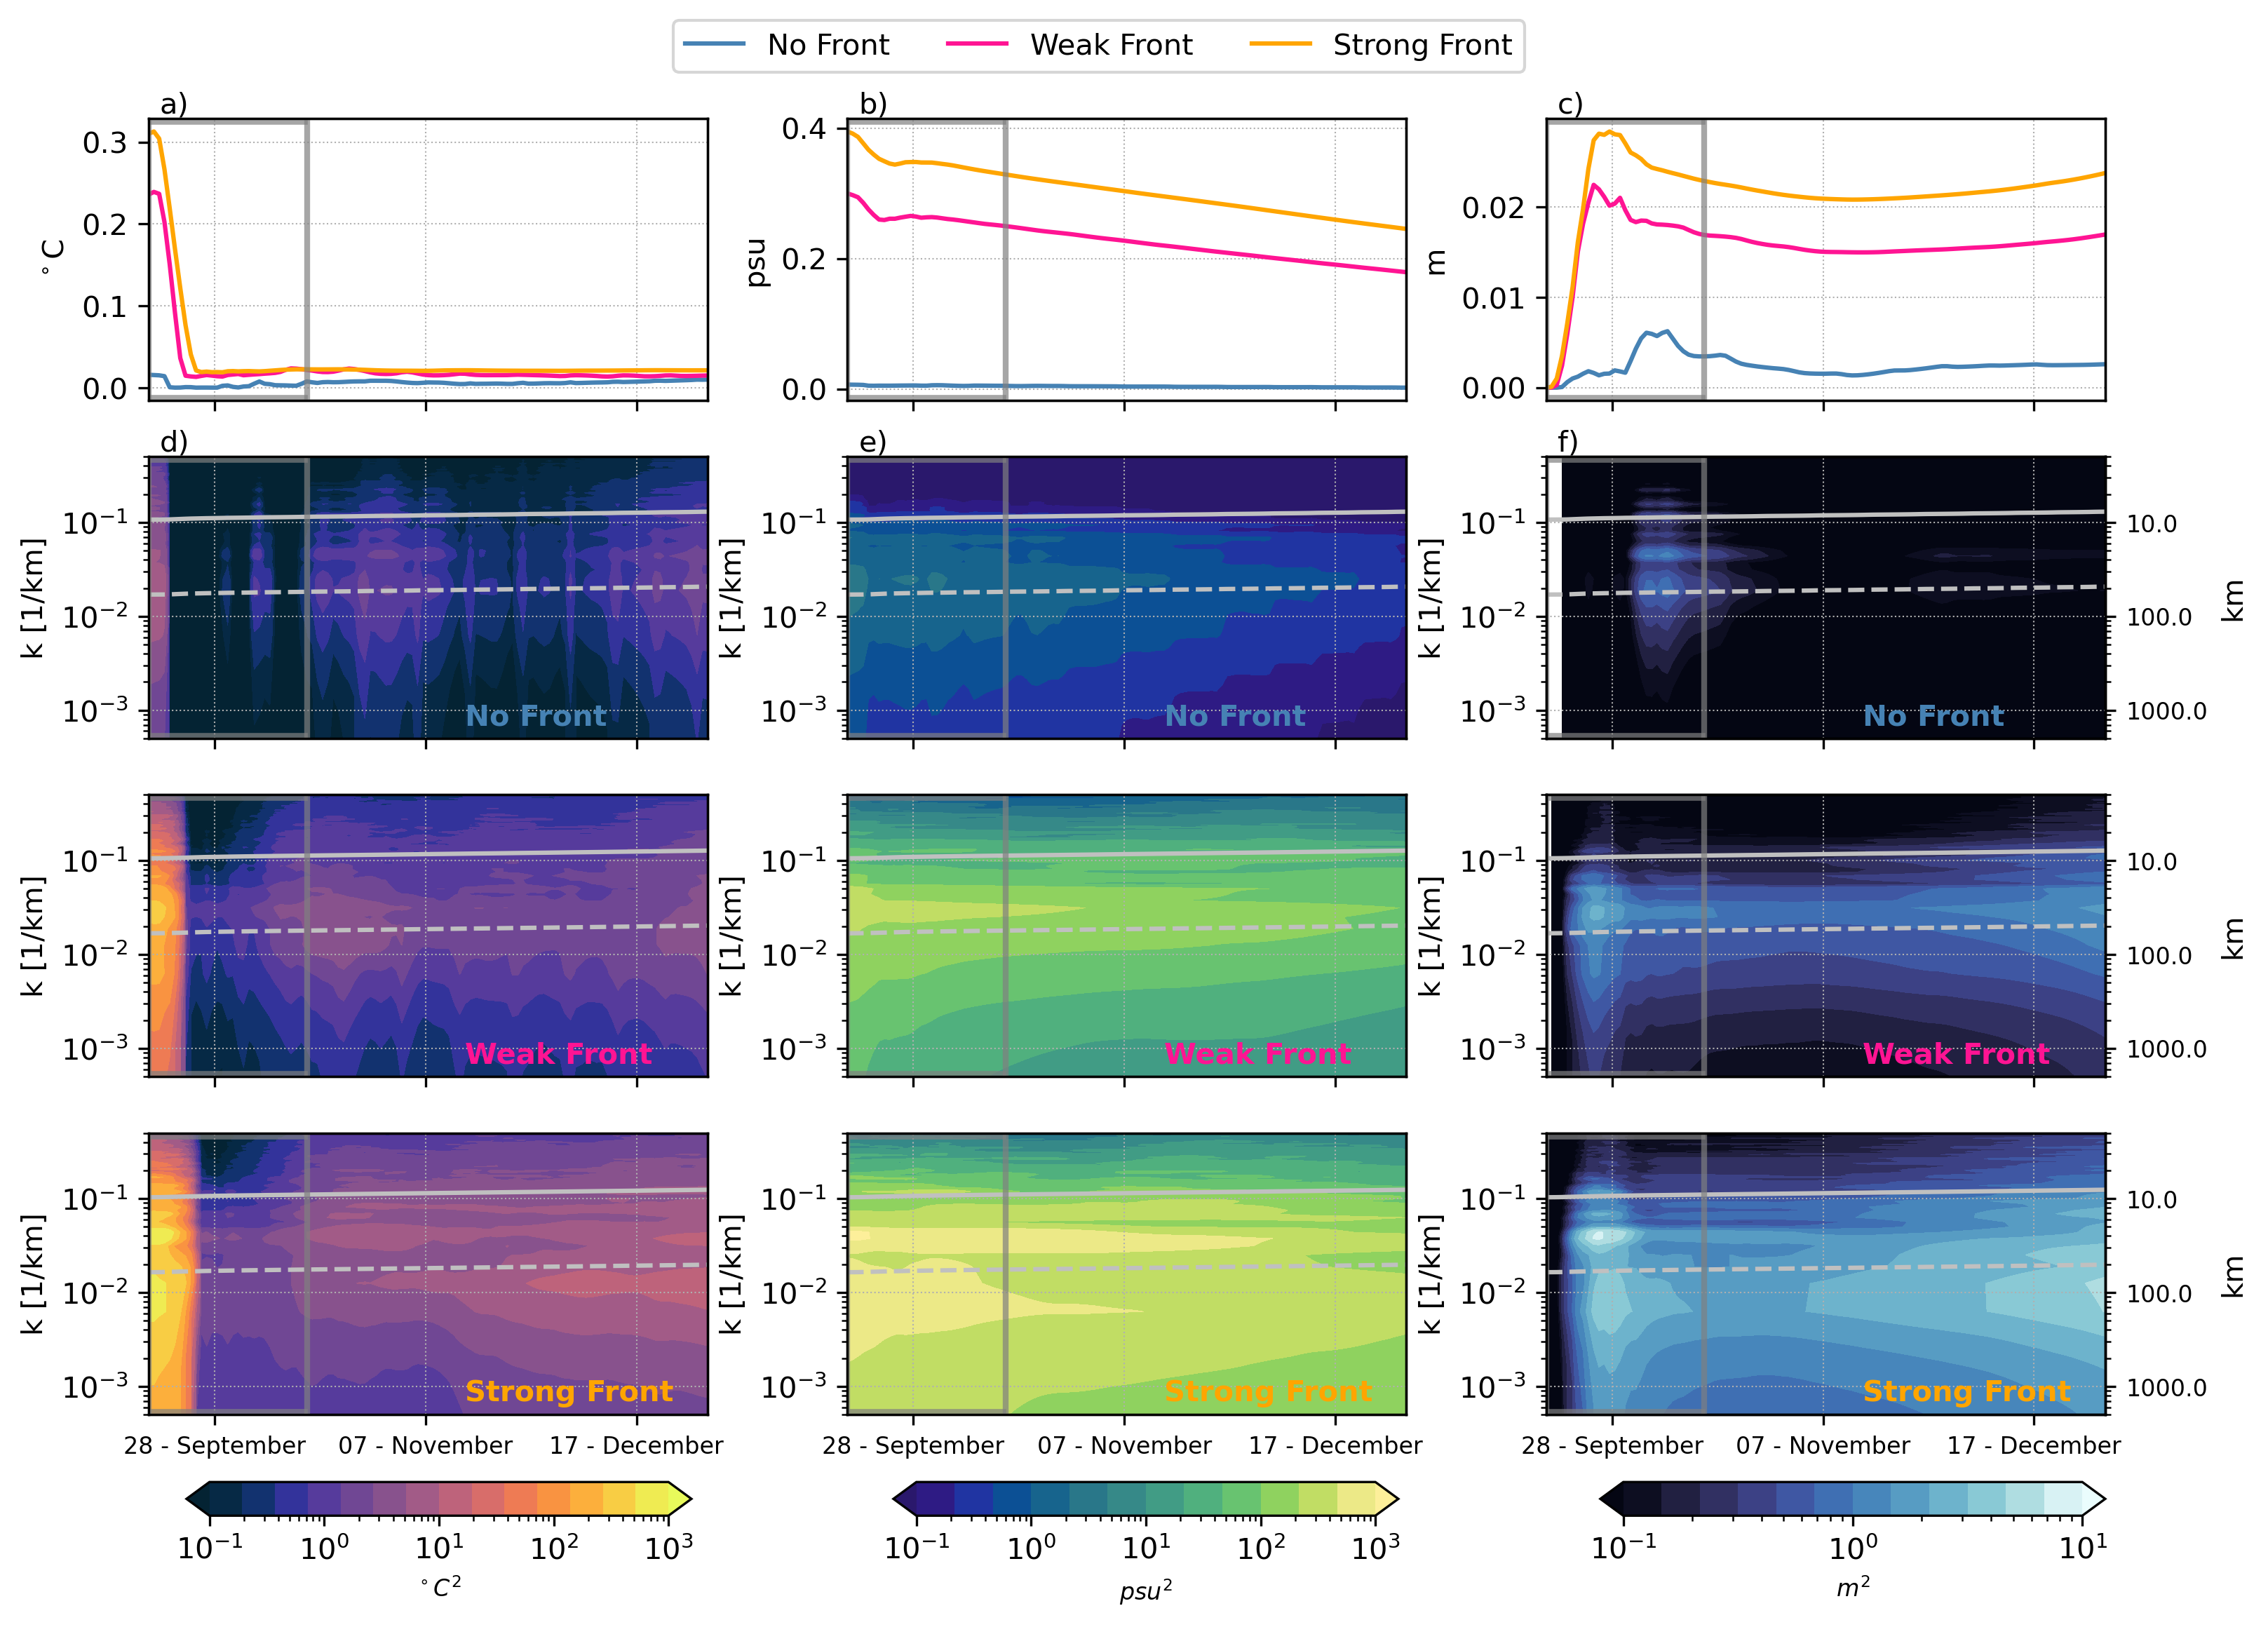

In [24]:
fig, ax = plt.subplots(4, 3, figsize=(12,8), dpi=300, sharex=True)

color=['steelblue','deeppink','orange']

surface_property_std.toce_front_0.plot(ax = ax[0,0], color=color[0])
surface_property_std.toce_front_05_noTf.plot(ax = ax[0,0], color=color[1])
surface_property_std.toce_front_1_noTf.plot(ax = ax[0,0], color=color[2])

ax[0,0].set_ylabel('$^\circ$C')

surface_property_std.soce_front_0.plot(ax = ax[0,1], color=color[0])
surface_property_std.soce_front_05_noTf.plot(ax = ax[0,1], color=color[1])
surface_property_std.soce_front_1_noTf.plot(ax = ax[0,1], color=color[2])

ax[0,1].set_ylabel('psu')

ice_property_std.icevolu_front_0.plot(ax = ax[0,2], color=color[0], label='No Front')
ice_property_std.icevolu_front_05_noTf.plot(ax = ax[0,2], color=color[1], label='Weak Front')
ice_property_std.icevolu_front_1_noTf.plot(ax = ax[0,2], color=color[2], label='Strong Front')
ax[0,2].plot(surface_property_std.time_counter[0].values, 0, color='silver', linestyle='--')#, label='$2\pi R_D$')
ax[0,2].plot(surface_property_std.time_counter[0].values, 0, color='silver')#, label='$R_D$')

ax[0,2].set_ylabel('m')

ax[0,2].legend(loc='upper center', bbox_to_anchor=(-0.8, 1.4), ncol=5)


################################################################################################
################################################################################################
################################################################################################

levels= np.logspace(-1,3,15)

cbar = ax[1,0].contourf(PSD_Temp_0.time.values, xaxis.isel(time=0), PSD_Temp_0.T, norm=matplotlib.colors.LogNorm(vmin=1e-1,vmax=1e3), levels=levels, extend='both',cmap=cm.cm.thermal)
ax[2,0].contourf(PSD_Temp_05.time.values, xaxis.isel(time=0), PSD_Temp_05.T, norm=matplotlib.colors.LogNorm(vmin=1e-1,vmax=1e3), levels=levels, extend='both',cmap=cm.cm.thermal)
ax[3,0].contourf(PSD_Temp_1.time.values, xaxis.isel(time=0), PSD_Temp_1.T, norm=matplotlib.colors.LogNorm(vmin=1e-1,vmax=1e3), levels=levels, extend='both',cmap=cm.cm.thermal)

ax[1,0].text(PSD_Temp_0.time[60].values,7e-4,"No Front", color=color[0], weight="bold")
ax[2,0].text(PSD_Temp_0.time[60].values,7e-4,"Weak Front", color=color[1], weight="bold")
ax[3,0].text(PSD_Temp_0.time[60].values,7e-4,"Strong Front", color=color[2], weight="bold")


(1/(2*np.pi*RD.R1_0)).plot(x="time_counter", ax=ax[1,0], color='silver', linestyle='--')
(1/(2*np.pi*RD.R1_05)).plot(x="time_counter", ax=ax[2,0], color='silver', linestyle='--')
(1/(2*np.pi*RD.R1_1)).plot(x="time_counter", ax=ax[3,0], color='silver', linestyle='--')

(1/RD.R1_0).plot(x="time_counter", ax=ax[1,0], color='silver')
(1/RD.R1_05).plot(x="time_counter", ax=ax[2,0], color='silver')
(1/RD.R1_1).plot(x="time_counter", ax=ax[3,0], color='silver')

[ a.set_yscale('log') for a in ax[1:,0]]
[ a.set_ylim((0.5e-3,0.5)) for a in ax[1:,0]]

cax = fig.add_axes([0.14, 0.05, 0.2, 0.02])
fig.colorbar(cbar, cax=cax, orientation='horizontal', extend="both")
cax.set_xlabel('$^\circ C ^2$',fontsize=8)
cbar.colorbar.ax.set_xscale('log')

################################################################################################
################################################################################################
################################################################################################

levels= np.logspace(-1,3,13)

cbar = ax[1,1].contourf(PSD_Salt_0.time.values, xaxis.isel(time=0), PSD_Salt_0.T, norm=matplotlib.colors.LogNorm(vmin=1e-1,vmax=1e3), levels=levels, extend='both',cmap=cm.cm.haline)
ax[2,1].contourf(PSD_Salt_05.time.values, xaxis.isel(time=0), PSD_Salt_05.T, norm=matplotlib.colors.LogNorm(vmin=1e-1,vmax=1e3), levels=levels, extend='both',cmap=cm.cm.haline)
ax[3,1].contourf(PSD_1.time.values, xaxis.isel(time=0), PSD_Salt_1.T, norm=matplotlib.colors.LogNorm(vmin=1e-1,vmax=1e3), levels=levels, extend='both',cmap=cm.cm.haline)

ax[1,1].text(PSD_Salt_0.time[60].values,7e-4,"No Front", color=color[0], weight="bold")
ax[2,1].text(PSD_Salt_0.time[60].values,7e-4,"Weak Front", color=color[1], weight="bold")
ax[3,1].text(PSD_Salt_0.time[60].values,7e-4,"Strong Front", color=color[2], weight="bold")


(1/(2*np.pi*RD.R1_0)).plot(x="time_counter", ax=ax[1,1], color='silver', linestyle='--')
(1/(2*np.pi*RD.R1_05)).plot(x="time_counter", ax=ax[2,1], color='silver', linestyle='--')
(1/(2*np.pi*RD.R1_1)).plot(x="time_counter", ax=ax[3,1], color='silver', linestyle='--')

(1/RD.R1_0).plot(x="time_counter", ax=ax[1,1], color='silver')
(1/RD.R1_05).plot(x="time_counter", ax=ax[2,1], color='silver')
(1/RD.R1_1).plot(x="time_counter", ax=ax[3,1], color='silver')

[ a.set_yscale('log') for a in ax[1:,1]]
[ a.set_ylim((0.5e-3,0.5)) for a in ax[1:,1]]

cax = fig.add_axes([0.42, 0.05, 0.2, 0.02])
fig.colorbar(cbar, cax=cax, orientation='horizontal', extend="both")
cax.set_xlabel('$psu^2$',fontsize=8)
cbar.colorbar.ax.set_xscale('log')

################################################################################################
################################################################################################
################################################################################################

levels= np.logspace(-1,1,13)

cbar = ax[1,2].contourf(PSD_ice_0.time.values, xaxis_ice.isel(time=0), PSD_ice_0.T, norm=matplotlib.colors.LogNorm(vmin=1e-1,vmax=1e1), levels=levels, extend='both',cmap=cm.cm.ice)
ax[2,2].contourf(PSD_ice_05.time.values, xaxis_ice.isel(time=0), PSD_ice_05.T, norm=matplotlib.colors.LogNorm(vmin=1e-1,vmax=1e1), levels=levels, extend='both',cmap=cm.cm.ice)
ax[3,2].contourf(PSD_ice_1.time.values, xaxis_ice.isel(time=0), PSD_ice_1.T, norm=matplotlib.colors.LogNorm(vmin=1e-1,vmax=1e1), levels=levels, extend='both',cmap=cm.cm.ice)

ax[1,2].text(PSD_ice_0.time[60].values,7e-4,"No Front", color=color[0], weight="bold")
ax[2,2].text(PSD_ice_0.time[60].values,7e-4,"Weak Front", color=color[1], weight="bold")
ax[3,2].text(PSD_ice_0.time[60].values,7e-4,"Strong Front", color=color[2], weight="bold")

(1/(2*np.pi*RD.R1_0)).plot(x="time_counter", ax=ax[1,2], color='silver', linestyle='--', label='$2\pi R_D$')
(1/(2*np.pi*RD.R1_05)).plot(x="time_counter", ax=ax[2,2], color='silver', linestyle='--')
(1/(2*np.pi*RD.R1_1)).plot(x="time_counter", ax=ax[3,2], color='silver', linestyle='--')

(1/RD.R1_0).plot(x="time_counter", ax=ax[1,2], color='silver', label='$R_D$')
(1/RD.R1_05).plot(x="time_counter", ax=ax[2,2], color='silver')
(1/RD.R1_1).plot(x="time_counter", ax=ax[3,2], color='silver')

[ a.set_yscale('log') for a in ax[1:,2]]
[ a.set_ylim((0.5e-3,0.5)) for a in ax[1:,2]]

ax_km = [ a.twinx() for a in ax[1:,2]]
[ a.set_yscale('log') for a in ax_km]
[ a.set_ylim((0.5e-3,0.5)) for a in ax_km]
[ a.set_ylabel('km') for a in ax_km]


cax = fig.add_axes([0.7, 0.05, 0.2, 0.02])
fig.colorbar(cbar, cax=cax, orientation='horizontal', extend="both")
cax.set_xlabel('$m^2$',fontsize=8)
cbar.colorbar.ax.set_xscale('log')

################################################################################################
################################################################################################
################################################################################################

[ envelope_plot(ice_property_std,spectra_time_slice,a,'grey') for a in ax.ravel() ] 
# envelope_plot(ice_property_std,spectra_time_slice,ax[0,1],'grey')
# [ envelope_plot(ice_property_std,spectra_time_slice,a,'grey') for a in ax[1:,1].ravel() ] 
[ a.grid(linewidth=0.5, linestyle=":") for a in ax.ravel() ] 
[ a.set_title('') for a in ax.ravel() ] 
[ a.set_xlabel('') for a in ax.ravel() ] 
[ a.set_ylabel('k [1/km]') for a in ax[1:,:].ravel() ] 

ax[-1,0].set_xlim(ice_property_std.time_counter[0].values,ice_property_std.time_counter[-1].values)
ax[-1,1].set_xlim(ice_property_std.time_counter[0].values,ice_property_std.time_counter[-1].values)

plt.subplots_adjust(hspace=0.2,wspace=0.25)

ax[0,0].text(0.02, 1.02, "a)", fontsize=10, transform=ax[0,0].transAxes)
ax[0,1].text(0.02, 1.02, "b)", fontsize=10, transform=ax[0,1].transAxes)
ax[0,2].text(0.02, 1.02, "c)", fontsize=10, transform=ax[0,2].transAxes)
ax[1,0].text(0.02, 1.02, "d)", fontsize=10, transform=ax[1,0].transAxes)
ax[1,1].text(0.02, 1.02, "e)", fontsize=10, transform=ax[1,1].transAxes)
ax[1,2].text(0.02, 1.02, "f)", fontsize=10, transform=ax[1,2].transAxes)

plt.draw()

labels = [item.get_position()[1] for item in ax_km[-1].get_yticklabels()]
updated_labels = [ 1/float(label) for label in labels]
[ a.set_yticklabels(updated_labels,fontsize=8) for a in ax_km ]

labels = [item.get_text() for item in ax[-1,0].get_xticklabels()]
updated_labels = [ date_fmt(label[5:10]) for label in labels]

ax[-1,0].set_xticklabels(updated_labels,fontsize=8)
ax[-1,1].set_xticklabels(updated_labels,fontsize=8)
ax[-1,2].set_xticklabels(updated_labels,fontsize=8)

plt.savefig('./figures/Fig_3_STD_spectra_temp_salt_ice.pdf',dpi=300,bbox_inches='tight')